In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from factor_analyzer.factor_analyzer import calculate_kmo
from sklearn.decomposition import FactorAnalysis

In [2]:
data = pd.read_csv("Testing.csv")

numeric_data = data.drop(columns=['Country', 'Year'])

numeric_data_standardized = (numeric_data - numeric_data.mean()) / numeric_data.std()

pca = PCA()
pca.fit(numeric_data_standardized)

explained_variance_ratio = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

for i, var in enumerate(explained_variance_ratio, start=1):
    print(f"PC{i}: {var * 100:.2f}% variance explained")

PC1: 37.50% variance explained
PC2: 20.93% variance explained
PC3: 17.76% variance explained
PC4: 13.27% variance explained
PC5: 10.54% variance explained


#### Implementing Factor Analysis

In [3]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(numeric_data)

kmo_all,kmo_model=calculate_kmo(df_scaled)
kmo_model

np.float64(0.6192560893229444)

In [4]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer()
fa.fit(df_scaled)
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

array([1.87499794, 1.04637215, 0.88814341, 0.6634086 , 0.5270779 ])

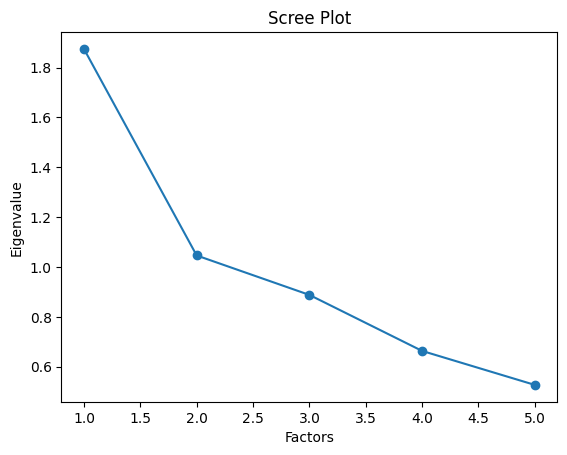

In [5]:
import matplotlib.pyplot as plt
plt.scatter(range(1,df_scaled.shape[1]+1),eigen_values)
plt.plot(range(1,df_scaled.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.show()

In [6]:
columns_for_fa = ['Carbon_dioxide_emissions','Electricity_production_non_renewable','Electricity production_renewable',
                'Micro_air_pollution', 'Greenhouse_emission']

data_filled = data[columns_for_fa]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_filled)

fa = FactorAnalysis(n_components=1)

factor_scores = fa.fit_transform(data_scaled)

data['Sustainability_index_FA'] = factor_scores.round(3)

pca = PCA(n_components=1)
pca_scores = pca.fit_transform(data_scaled)
data['Sustainability_index_PCA'] = pca_scores.round(3)

data.to_csv("Sustainability_index.csv", index=False)